---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_workflow_task.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## ⚙️⏩ Running multiple tasks.

In [1]:
# install extra requirements
# !pip install roux[workflow]

In [2]:
## params
kernel='roux'
cpus=2
force=True

In [32]:
%run ../roux/workflow/task.py

0it [00:00, ?it/s]

## Inputs

In [4]:
!ls tests/input/roux_workflow_task/

script.ipynb  script_pms.py  script.py	script.sh


In [5]:
script_types={
    'sh':{
        # 'pre':f'source ~/.bashrc;micromamba run -n {kernel} '
        'pre':f'source ../.venv/bin/activate;uv run ',
    },
    'ipynb':{
        'pre':'uv run ',
    },
    'py':{
        'pre':'uv run ',
    },
    }

In [6]:
from roux.workflow.log import test_params
for k in script_types:
    script_types[k]['params']=[
        dict(
            input_path=str(i),
            output_path=f'tests/outputs/{k}{i}.txt'
        )
        for i in range(cpus)
        ]
test_params(script_types[k]['params'])

## for testing
import os
os.chdir('/home/rdandage/Documents/work/roux/examples')

## parameters
input_path="0"
output_path="tests/outputs/py0.txt"


### Pre. of the params

In [7]:
params=script_types[k]['params']

In [8]:
flt_params({'k':params[0]})

ℹ️ Info: parameters_list_flt reduced because force=False: 1 -> 0


{}

In [9]:
flt_params(params)

ℹ️ Info: parameters_list_flt reduced because force=False: 2 -> 0


[]

In [10]:
check_tasks(params)

ℹ️ Info: parameters_list_flt reduced because force=False: 2 -> 0


## `run_tasks`

In [11]:
dfs={}

### `ipynb`

In [12]:
script_type='ipynb'
params=script_types[script_type]['params']

#### with `py`

In [13]:
dfs['ipynb']=run_tasks(
    'tests/input/roux_workflow_task/script.ipynb',
    params=params,
    cpus=cpus,
    kernel=kernel,

    runner='py',
    
    force=force,
)
dfs['ipynb']

ℹ️ Info: running in parallel (cpus=2)..


Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

ℹ️ Info: Time taken: 0:00:01.295403


,input_path,output_path
nb path,,
tests/outputs/ipynb0_reports/20250617T213109_script.ipynb,0,tests/outputs/ipynb0.txt
tests/outputs/ipynb1_reports/20250617T213109_script.ipynb,1,tests/outputs/ipynb1.txt


#### with `bash`

In [14]:
params=[{**pms,**{'output_path':Path(pms['output_path']).with_stem(Path(pms['output_path']).stem+'_bash').as_posix() }} for pms in params]
params

[{'input_path': '0', 'output_path': 'tests/outputs/ipynb0_bash.txt'},
 {'input_path': '1', 'output_path': 'tests/outputs/ipynb1_bash.txt'}]

In [15]:
dfs['ipynb_bash']=run_tasks(
    f'tests/input/roux_workflow_task/script.{script_type}',
    params=params,
    cpus=cpus,
    kernel=kernel,

    runner='bash',
    
    force=force,
)
dfs['ipynb_bash']

💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..
  0%|                                                                                | 0/2 [00:00<?, ?it/s]⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 283.98it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//d867c194b529ead1e23d5e083dc794fdbbfb54d951e606912d13efa2282b9402.yaml
✅ Done: processing.


,input_path,output_path
/home/rdandage/Documents/work/roux/examples/.roux//a1dc163f76e6563ce70eb26b66f69ea79e849d5c02977266b50479729cde4377.sh,0,tests/outputs/ipynb0_bash.txt
/home/rdandage/Documents/work/roux/examples/.roux//9b3284d96678da3f6689dc85682f00b93101db68a8eef29e93a0e9005f3b8967.sh,1,tests/outputs/ipynb1_bash.txt


### `sh`/`py`

#### with `bash`

In [16]:
for script_type in ['py','sh']:
    dfs[script_type]=run_tasks(
        f'tests/input/roux_workflow_task/script.{script_type}',
        params=script_types[script_type]['params'],
        cpus=cpus,
        kernel=kernel,
    
        runner='bash',
        
        force=force,
    )

💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..
  0%|                                                                                | 0/2 [00:00<?, ?it/s]⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 408.22it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//87e13bac9f3ee14f9eac4d775d04de8686f3c2a3db3f759bca4b9a7136915a6d.yaml
✅ Done: processing.
💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..
  0%|                                                                                | 0/2 [00:00<?, ?it/s]⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
⚠️ Warning: forcing setup (re-rewiting the sbatch scripts)..
100%|██████████████████████████████████████████████████

### Validations

In [17]:
def files_are_identical(file1: Path, file2: Path) -> bool:
    return open(file1,'r').read() == open(file2,'r').read()
    
st1=list(dfs.keys())[0]
for st2 in list(dfs.keys())[1:]:
    assert (
        dfs[st1].reset_index(drop=True)
            .join(
        dfs[st2].reset_index(drop=True).add_suffix('2')
            )
        .apply(
            lambda x: files_are_identical(
                x['output_path'],
                x['output_path2'],
            ),
            axis=1
        )
    ).all(), (dfs[st1],dfs[st2])

## `slurm`

### Setup

In [18]:
runner=infer_runner(
    runner='slurm',
    script_type=None,
)

⚠️ Warning: runner=bash


In [19]:
# Example Usage
parse_time("4h")  # Replace with "30m", "10s", etc.

datetime.timedelta(seconds=14400)

In [20]:
if runner=='slurm':
    print(get_sq())

In [21]:
# monitor_duration("1s")

In [22]:
if runner=='slurm':
    print(get_jobsn(
        ))

In [23]:
if runner=='slurm':
    print(
        is_q_empty(
        # user
        # verbose=False,
        )
    )

In [24]:
# def get_tried_job_keys(
#     cache_dir_path
#     )
#     from roux.lib.io import read_ps
#     # cache_dir_path='.roux/'
#     return list(set([Path(p).parent.parent.stem for p in read_ps(f'{cache_dir_path}/*/logs/*.out')]))

### `script_types`

In [25]:
%run ../roux/workflow/task.py
# params
for script_type in script_types:
    logging.info(script_type)
# script_type='sh'
    params=script_types[script_type]['params']
    params=[{**pms,**{'output_path':Path(pms['output_path']).with_stem(Path(pms['output_path']).stem+'_slurm').as_posix() }} for pms in params]
    params
    
    script_pre=script_types[script_type]['pre']
    
    run_tasks(
        f'tests/input/roux_workflow_task/script.{script_type}',
        params=params,
        script_pre=script_pre,
    
        append_header="""
    #SBATCH --time=00:10:00
    #SBATCH --ntasks=1
    #SBATCH --cpus-per-task=1
    #SBATCH --mem=1gb   
        """,
    
        cpus=cpus, ## feed at a time (feedn)
        kernel=kernel,
    
        runner='slurm',    
        force=force,
        testn=1,
    )

0it [00:00, ?it/s]

ℹ️ Info: sh
⚠️ Warning: runner=bash
⚠️ Warning: filtered to 1 jobs ..
💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..

100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 256.05it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//8faffbbd647c09d518e3aaaf7626e8b76d3e800a0be1492f927a1cf368712853.yaml
✅ Done: processing.
ℹ️ Info: ipynb
⚠️ Warning: runner=bash
⚠️ Warning: filtered to 1 jobs ..
💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..

100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 238.80it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//60622b19ab689d823dcda33ece6644de0bd038bd2db5d251ddc7d056e045212f.yaml
✅ Done: processing.
ℹ️ Info: py
⚠️ Warning: runner=bash
⚠️ Warning: filtered to 1 jobs ..
💽 Loading: params fro

### Skip already submitted jobs

In [26]:
run_tasks(
    f'tests/input/roux_workflow_task/script.{script_type}',
    params=params,
    script_pre=script_pre,

    append_header="""
#SBATCH --time=00:10:00
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem=1gb   
    """,

    cpus=cpus, ## feed at a time (feedn)
    kernel=kernel,

    runner='slurm',    
    # force=force,
)

⚠️ Warning: runner=bash
ℹ️ Info: parameters_list_flt reduced because force=False: 2 -> 1
💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..

100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 312.26it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//ec362eb57dc02afeeedfd8b3930b11368c7eae10f253ea35515691ecb66e8d66.yaml
✅ Done: processing.


,input_path,output_path
/home/rdandage/Documents/work/roux/examples/.roux//b50979c9a866458c007259fa9f214a8199cb0d2710e15efd867f7f5d2b8dfc69.sh,1,tests/outputs/py1_slurm.txt


### Feeding

In [27]:
%run ../roux/workflow/task.py
run_tasks(
    f'tests/input/roux_workflow_task/script.{script_type}',
    params=params,
    script_pre=script_pre,

    append_header="""
#SBATCH --time=00:10:00
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem=1gb   
    """,

    cpus=cpus, ## feed at a time (feedn)
    kernel=kernel,

    runner='slurm',    
    force=force,
    testn=1,

    feed_interval='1s',
    feed_duration='5s', #hr 
    feed_if_jobs_max=0.5,
)

0it [00:00, ?it/s]

⚠️ Warning: runner=bash
⚠️ Warning: filtered to 1 jobs ..
💽 Loading: params from the input_path ..
⚙️ Configuring: paths ..
⏳⏳ Processing: on bash, 2 at a time ..


100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 239.67it/s]
🗂️ Saving: params_jobs_path=/home/rdandage/Documents/work/roux/examples/.roux//ff205d79b5e0b4dc5097d5eaea1ac45f3b9e4bad44eebaef2b326ad7009a4308.yaml
✅ Done: processing.


,input_path,output_path
/home/rdandage/Documents/work/roux/examples/.roux//721b185553045b685b844c60d20fa63544bc9c513d6aa4a0f781454a699310cc.sh,0,tests/outputs/py0_slurm.txt


## `run_tasks_nb`

**Demo inputs**

In [28]:
# # demo data
# import seaborn as sns
# data=sns.load_dataset('iris')
# ## creating a list of inputs
# import itertools
# inputs=[{'kws_plot_modified':dict(zip(['x','y'],t))} for t in itertools.permutations(data.select_dtypes(float).columns.tolist(),2)]
# inputs

# # [{'kws_plot_modified': {'x': 'sepal_length', 'y': 'sepal_width'}},
# #  {'kws_plot_modified': {'x': 'sepal_length', 'y': 'petal_length'}},
# #  {'kws_plot_modified': {'x': 'sepal_length', 'y': 'petal_width'}},
# #  {'kws_plot_modified': {'x': 'sepal_width', 'y': 'sepal_length'}},
# #  {'kws_plot_modified': {'x': 'sepal_width', 'y': 'petal_length'}},
# #  {'kws_plot_modified': {'x': 'sepal_width', 'y': 'petal_width'}},
# #  {'kws_plot_modified': {'x': 'petal_length', 'y': 'sepal_length'}},
# #  {'kws_plot_modified': {'x': 'petal_length', 'y': 'sepal_width'}},
# #  {'kws_plot_modified': {'x': 'petal_length', 'y': 'petal_width'}},
# #  {'kws_plot_modified': {'x': 'petal_width', 'y': 'sepal_length'}},
# #  {'kws_plot_modified': {'x': 'petal_width', 'y': 'sepal_width'}},
# #  {'kws_plot_modified': {'x': 'petal_width', 'y': 'petal_length'}}]

### Running the tasks

In [29]:
# # from roux.workflow.task import run_tasks
# parameters_list=run_tasks(
#     '../examples/roux_viz_io.ipynb', ## parameterised jupyter notebook (papermill compatible).
#     inputs=inputs,#[:2], ## list of inputs
#     output_path_base='tests/output/plot/plot_modified_by_tasks/{KEY}/plot.png', ## base output path, where {KEY} is a unique placeholder for each input.
#     kernel='roux', ## virtual environment
#     force=True, ## rerun by overwritting the outputs
#     # test1=True,
#     # fast=False, ## parallel processing. set number of workers using the `fast_workers` parameter 
#     fast=True,
# )
# parameters_list

### The outputs

In [30]:
# output_paths=list(parameters_list.keys())

In [31]:
# import matplotlib.pyplot as plt
# cols=4
# fig,axs=plt.subplots(round(len(output_paths)/cols),cols)
# for ax,p in zip(axs.ravel(),output_paths):
#     ax.imshow(plt.imread(p))
#     ax.axis('off')

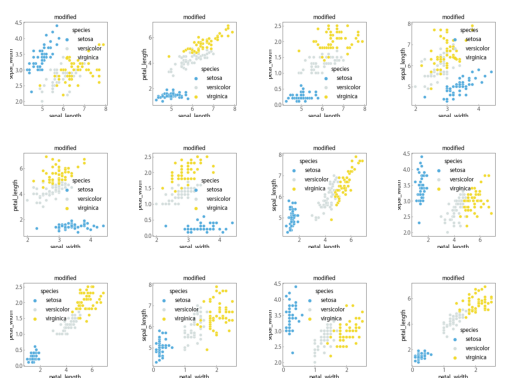

#### Documentation
[`roux.workflow.task.run_tasks`](https://github.com/rraadd88/roux#module-rouxworkflowtaskrun_tasks)